# Eerste Markdown cell

(last updated: June 19, 2023)

Test van Chris

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
temperature_data = pd.read_csv('Temperature_change_cleaned.csv')
temperature_dataframe = pd.DataFrame(temperature_data)
temperature_dataframe.head()

df_melt = pd.melt(temperature_dataframe, id_vars=['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element', 'Unit'], var_name='Year', value_name='Temperature')
df_melt = df_melt.sort_values(by=['Area', 'Year'])
df_melt['Year'] = df_melt['Year'].str.replace('Y', '')
df_melt['std'] = ''
for index, row in df_melt.iterrows():
    if row['Element'] == 'Standard Deviation':
        df_melt.at[index, 'std'] = row['Temperature']
    else:
        df_melt.at[index, 'std'] = df_melt.at[index + 1, 'Temperature']
filtering = df_melt.drop(df_melt[df_melt['Element'] == 'Standard Deviation'].index)

filtering['Mean'] = filtering.groupby(['Area', 'Months'])['Temperature'].transform('mean')
filtering['z-score'] = (filtering['Temperature'] - filtering['Mean']) / filtering['std']
filtering = filtering.drop(['Temperature', 'std', 'Mean'], axis=1)

filtering.to_csv('new_temperature.csv', index = False)

In [34]:
co2_data = pd.read_csv('CO2_emissions_cleaned.csv')
co2_dataframe = pd.DataFrame(co2_data)
co2_dataframe.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [45]:
methane_data = pd.read_csv('Methane_emissions_cleaned.csv')
methane_dataframe = pd.DataFrame(methane_data)
methane_dataframe.head()


df_transposed = pd.melt(methane_dataframe, id_vars=['Country'], var_name='Year', value_name='Methane value')
df_transposed.sort_values(['Country', 'Year'], inplace=True)
df_transposed['Year'] = pd.to_numeric(df_transposed['Year'], errors='coerce')
df_transposed = df_transposed.dropna(subset=['Year'])

print(df_transposed)

df_transposed.to_csv('new_methane.csv', index = False)

          Country    Year Methane value
5940  Afghanistan  1990.0          8.97
5749  Afghanistan  1991.0          9.07
5558  Afghanistan  1992.0          8.99
5367  Afghanistan  1993.0          8.89
5176  Afghanistan  1994.0          8.96
...           ...     ...           ...
1424     Zimbabwe  2014.0         10.82
1233     Zimbabwe  2015.0         11.79
1042     Zimbabwe  2016.0         11.38
851      Zimbabwe  2017.0         11.56
660      Zimbabwe  2018.0         11.85

[5539 rows x 3 columns]


In [36]:
elnino_data = pd.read_csv('ElNino_LaNina_cleaned.csv')
elnino_dataframe = pd.DataFrame(elnino_data)
elnino_dataframe.head()

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


In [ ]:
# Daniel



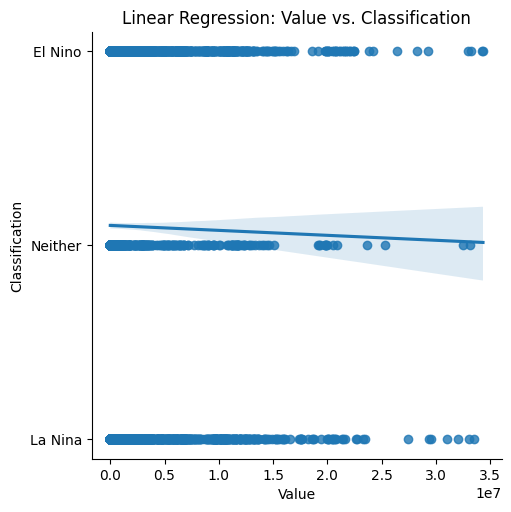

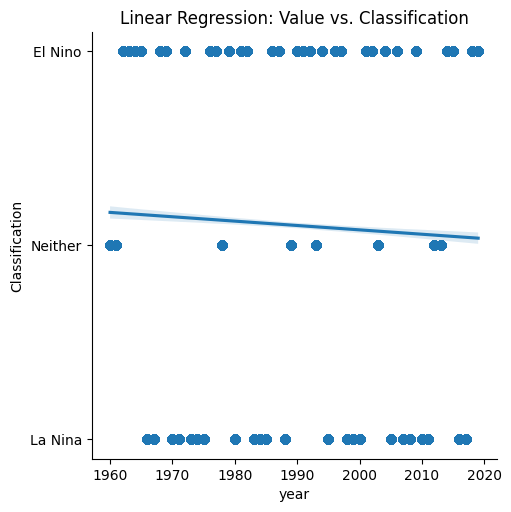

In [37]:
# Daniel

co2_df = pd.read_csv('CO2_emissions_cleaned.csv')

elnino_df = pd.read_csv('ElNino_LaNina_cleaned.csv')

merged_df = pd.merge(co2_df, elnino_df, on='year')

merged_df.sort_values(['country_code', 'year'], inplace=True)

merged_df['Classification'] = ''

for index, row in merged_df.iterrows():
    elnino_values = row['Jan':'Dec']
    max_abs_value = elnino_values.abs().max()
    
    if max_abs_value >= 0.5:
        max_value = elnino_values.max()
        if abs(max_value) == max_abs_value:
            merged_df.at[index, 'Classification'] = '2' #elnino
        else:
            merged_df.at[index, 'Classification'] = '0' #lanina
    else:
        merged_df.at[index, 'Classification'] = '1' #neither

merged_df.to_csv('CO2_merge_elnino_lanina.csv')

CO2_elnino_df = pd.read_csv('CO2_merge_elnino_lanina.csv')


sns.lmplot(data=CO2_elnino_df, x='value', y='Classification')
plt.yticks([0, 1, 2], ['La Nina', 'Neither', 'El Nino'])
plt.xlabel('Value')
plt.ylabel('Classification')
plt.title('Linear Regression: Value vs. Classification')
plt.show()

sns.lmplot(data=CO2_elnino_df, x='year', y='Classification')
plt.yticks([0, 1, 2], ['La Nina', 'Neither', 'El Nino'])
plt.xlabel('year')
plt.ylabel('Classification')
plt.title('Linear Regression: Value vs. Classification')
plt.show()


In [38]:
new_temperature_data = pd.read_csv('new_temperature.csv')
new_temperature_dataframe = pd.DataFrame(new_temperature_data)
new_temperature_dataframe.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,z-score
0,2,Afghanistan,7001,January,7271,Temperature change,°C,1961,0.169300
1,2,Afghanistan,7002,February,7271,Temperature change,°C,1961,-0.700639
2,2,Afghanistan,7003,March,7271,Temperature change,°C,1961,0.123397
3,2,Afghanistan,7004,April,7271,Temperature change,°C,1961,-1.543048
4,2,Afghanistan,7005,May,7271,Temperature change,°C,1961,0.541270


In [46]:
new_methane_data = pd.read_csv('new_methane.csv')
new_methane_dataframe = pd.DataFrame(new_methane_data)
new_methane_dataframe.head()

,Country,Year,Methane value
0,Afghanistan,1990.0,8.97
1,Afghanistan,1991.0,9.07
2,Afghanistan,1992.0,8.99
3,Afghanistan,1993.0,8.89
4,Afghanistan,1994.0,8.96


In [47]:
new_methane_dataframe['Mean'] = new_methane_dataframe.groupby('Country')['Methane value'].transform('mean')
new_methane_dataframe['Std'] = new_methane_dataframe.groupby('Country')['Methane value'].transform('std')
new_methane_dataframe['z-score'] = (new_methane_dataframe['Methane value'] - new_methane_dataframe['Mean']) / new_methane_dataframe['Std']

new_methane_dataframe = new_methane_dataframe[['Country', 'Year', 'Methane value', 'z-score']]

new_methane_dataframe.to_csv('new_methane.csv', index = False)

In [48]:
new_methane_data = pd.read_csv('new_methane.csv')
new_methane_dataframe = pd.DataFrame(new_methane_data)
new_methane_dataframe.head()

,Country,Year,Methane value,z-score
0,Afghanistan,1990.0,8.97,-0.722564
1,Afghanistan,1991.0,9.07,-0.718711
2,Afghanistan,1992.0,8.99,-0.721793
3,Afghanistan,1993.0,8.89,-0.725647
4,Afghanistan,1994.0,8.96,-0.722950


In [49]:
co2_dataframe['Mean'] = co2_dataframe.groupby('country_code')['value'].transform('mean')
co2_dataframe['Std'] = co2_dataframe.groupby('country_code')['value'].transform('std')
co2_dataframe['z-score'] = (co2_dataframe['value'] - co2_dataframe['Mean']) / co2_dataframe['Std']

new_co2_dataframe = co2_dataframe[['country_code', 'country_name', 'year', 'value', 'z-score']]

new_co2_dataframe.to_csv('new_co2.csv', index=False)


In [50]:
new_co2_data = pd.read_csv('new_co2.csv')
new_co2_dataframe = pd.DataFrame(new_co2_data)
new_co2_dataframe.head()

,country_code,country_name,year,value,z-score
0,ABW,Aruba,1960,11092.675,0.769185
1,ABW,Aruba,1961,11576.719,0.850040
2,ABW,Aruba,1962,12713.489,1.039926
3,ABW,Aruba,1963,12178.107,0.950496
4,ABW,Aruba,1964,11840.743,0.894143


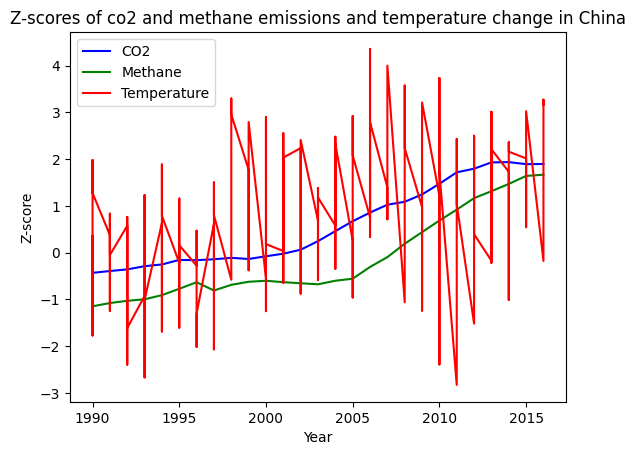

In [54]:
co2_china = new_co2_dataframe[(new_co2_dataframe['country_name'] == 'China') & (new_co2_dataframe['year'].between(1990, 2016))]
methane_china = new_methane_dataframe[(new_methane_dataframe['Country'] == 'China') & (new_methane_dataframe['Year'].between(1990, 2016))]
temperature_china = new_temperature_dataframe[(new_temperature_dataframe['Area'] == 'China') & (new_temperature_dataframe['Year'].between(1990, 2016))]

# Line plot for all variables on the same graph
plt.plot(co2_china['year'], co2_china['z-score'], label='CO2', color='blue')
plt.plot(methane_china['Year'], methane_china['z-score'], label='Methane', color='green')
plt.plot(temperature_china['Year'], temperature_china['z-score'], label='Temperature', color='red')

plt.xlabel('Year')
plt.ylabel('Z-score')
plt.title('Z-scores of co2 and methane emissions and temperature change in China')
plt.legend()
plt.show()
